## Hugo Borges Garutti

### Aperfeiçoei meu conhecimento com a programação Pyhton ao me testar. Descobri os equívocos que cometi e as minhas maiores dificuldades. Utilizei mais pesquisa online para procurar soluções aos meus problemas. Revi e estudei alguns pontos das aulas.

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [38]:
# !pip install pandas=="0.24.0" --quiet
# !pip install seaborn=="0.9.0" --quiet
# !pip install scipy=="1.2.0" --quiet

In [39]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [40]:
# solução
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.set_index('filmeId', inplace = True)

In [41]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [42]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [43]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [44]:
# solução
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv')
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']

In [45]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [46]:
# solução
filmes['nota_media'] = notas.groupby(['filmeId'])['nota'].mean()

In [47]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [48]:
# solução para calcular o total de votos por filme
notas.groupby(['filmeId']).count()['momento']

filmeId
1         215
2         110
3          52
4           7
5          49
6         102
7          54
8           8
9          16
10        132
11         70
12         19
13          8
14         18
15         13
16         82
17         67
18         20
19         88
20         15
21         89
22         36
23         16
24         28
25         76
26         13
27          9
28         11
29         38
30          3
         ... 
188189      1
188301      3
188675      1
188751      1
188797      1
188833      1
189043      1
189111      1
189333      2
189381      1
189547      1
189713      1
190183      1
190207      1
190209      1
190213      1
190215      1
190219      1
190221      1
191005      1
193565      1
193567      1
193571      1
193573      1
193579      1
193581      1
193583      1
193585      1
193587      1
193609      1
Name: momento, Length: 9724, dtype: int64

In [49]:
# solução para criar a nova coluna e filtrar os filmes
filmes['total_de_votos'] = notas.groupby(['filmeId']).count().query('momento >= 50')['momento']
filmes.dropna(subset = ['total_de_votos'], inplace = True)

In [50]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

Text(0, 0.5, 'Frequência')

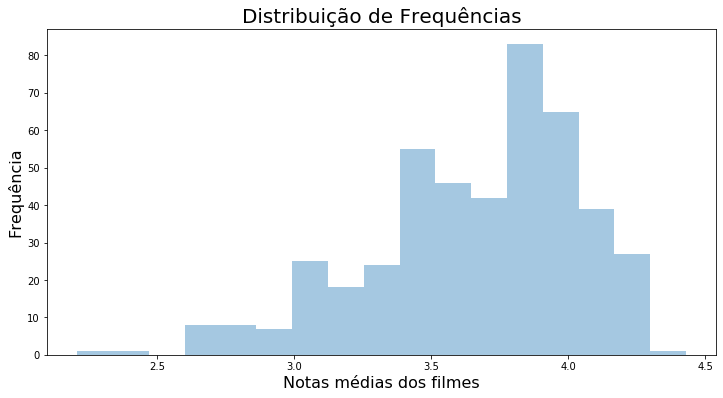

In [51]:
# solução histograma
ax = sns.distplot(filmes['nota_media'], 
                  norm_hist = False, 
                  kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 20)
ax.set_xlabel('Notas médias dos filmes', fontsize = 16)
ax.set_ylabel('Frequência', fontsize = 16)

Text(0, 0.5, 'Porcentagem acumulada')

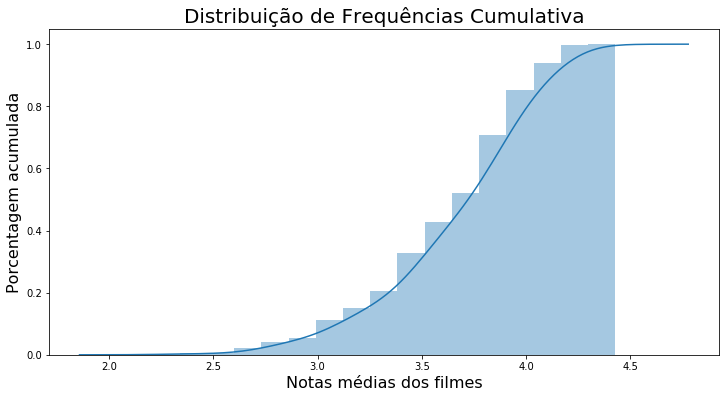

In [52]:
# solução cumulativa
ax = sns.distplot(filmes['nota_media'], 
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True})

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências Cumulativa', fontsize = 20)
ax.set_xlabel('Notas médias dos filmes', fontsize = 16)
ax.set_ylabel('Porcentagem acumulada', fontsize = 16)

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0, 0.5, 'Frequência')

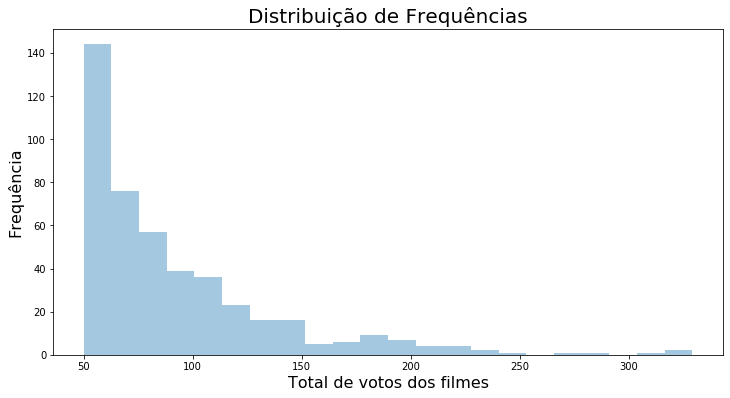

In [53]:
# solução histograma
ax = sns.distplot(filmes['total_de_votos'], 
                  norm_hist = False, 
                  kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 20)
ax.set_xlabel('Total de votos dos filmes', fontsize = 16)
ax.set_ylabel('Frequência', fontsize = 16)

Text(0, 0.5, 'Porcentagem acumulada')

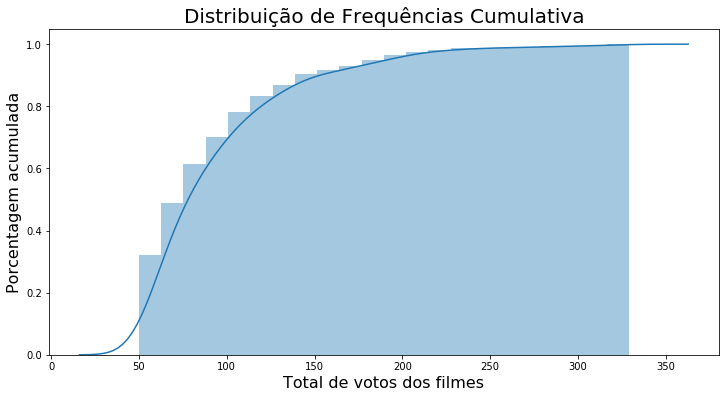

In [54]:
# solução cumulativa
ax = sns.distplot(filmes['total_de_votos'], 
                  hist_kws = {'cumulative': True},
                  kde_kws = {'cumulative': True})

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências Cumulativa', fontsize = 20)
ax.set_xlabel('Total de votos dos filmes', fontsize = 16)
ax.set_ylabel('Porcentagem acumulada', fontsize = 16)

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [55]:
# solução
nota_limite_dos_20_porcento = filmes['nota_media'].quantile(0.2)
nota_limite_dos_20_porcento

3.3742857142857146

In [56]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.37


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [57]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [58]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

Text(0, 0.5, 'Total')

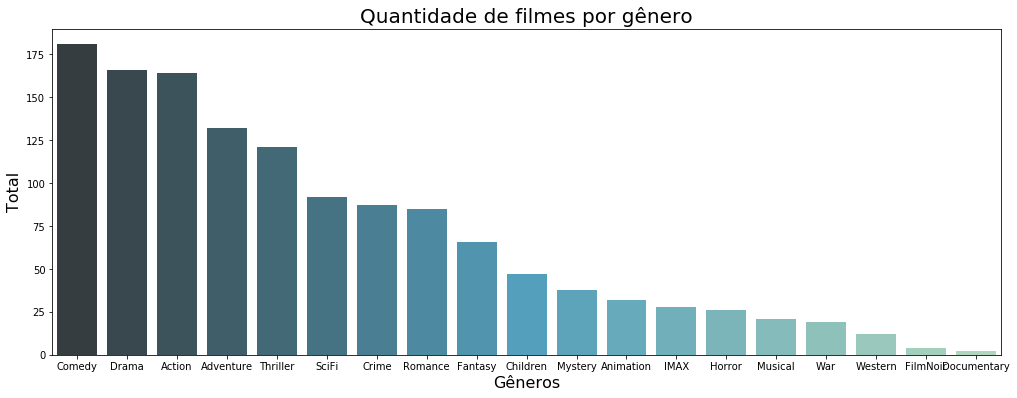

In [59]:
# solução
contagem_generos = generos.sum().to_frame().reset_index()
contagem_generos.columns = ['Generos', 'Filmes por genero']
contagem_generos.sort_values(by = ['Filmes por genero'], 
                             ascending = False, 
                             inplace = True)

ax = sns.barplot(x = 'Generos',
                 y = 'Filmes por genero',
                 data = contagem_generos,
                 palette="GnBu_d")

ax.figure.set_size_inches(17, 6)
ax.set_title('Quantidade de filmes por gênero', fontsize = 20)
ax.set_xlabel('Gêneros', fontsize = 16)
ax.set_ylabel('Total', fontsize = 16)

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [60]:
# solução
top5_generos_em_quantidade_de_filmes = contagem_generos.iloc[:5]
top5_generos_em_quantidade_de_filmes

,Generos,Filmes por genero
4,Comedy,181
7,Drama,166
0,Action,164
1,Adventure,132
16,Thriller,121


In [61]:
print(top5_generos_em_quantidade_de_filmes)

      Generos  Filmes por genero
4      Comedy                181
7       Drama                166
0      Action                164
1   Adventure                132
16   Thriller                121


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [62]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [63]:
# solucão
contagem_votos_por_genero_por_filme = votos_por_genero_por_filme.sum().to_frame().reset_index()
contagem_votos_por_genero_por_filme.columns = ['Generos', 'Total de votos']
contagem_votos_por_genero_por_filme.sort_values(by = ['Total de votos'], 
                                                ascending = False, 
                                                inplace = True)
contagem_votos_por_genero_por_filme

,Generos,Total de votos
0,Action,15734.0
7,Drama,15445.0
4,Comedy,15330.0
1,Adventure,13117.0
16,Thriller,11907.0
15,SciFi,8989.0
5,Crime,8649.0
14,Romance,7444.0
8,Fantasy,5993.0
3,Children,4331.0


Text(0, 0.5, 'Total')

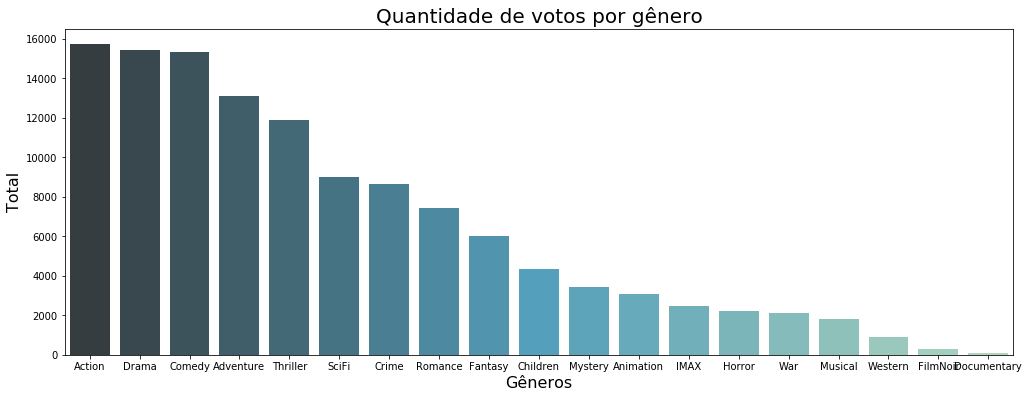

In [64]:
# solução
ax = sns.barplot(x = 'Generos',
                 y = 'Total de votos',
                 data = contagem_votos_por_genero_por_filme,
                 palette="GnBu_d")

ax.figure.set_size_inches(17, 6)
ax.set_title('Quantidade de votos por gênero', fontsize = 20)
ax.set_xlabel('Gêneros', fontsize = 16)
ax.set_ylabel('Total', fontsize = 16)

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [65]:
# solucao código
popularidade_por_filme_por_genero = pd.DataFrame(contagem_generos)
popularidade_por_filme_por_genero['Votos por genero'] = contagem_votos_por_genero_por_filme['Total de votos']
popularidade_por_filme_por_genero
popularidade_por_filme_por_genero['Popularidade media'] = (popularidade_por_filme_por_genero['Votos por genero'] / popularidade_por_filme_por_genero['Filmes por genero']).round(2)
popularidade_por_filme_por_genero.sort_values(by = ['Popularidade media'], 
                                                   ascending = False, 
                                                   inplace = True)
popularidade_por_filme_por_genero

,Generos,Filmes por genero,Votos por genero,Popularidade media
17,War,19,2113.0,111.21
5,Crime,87,8649.0,99.41
1,Adventure,132,13117.0,99.37
16,Thriller,121,11907.0,98.40
15,SciFi,92,8989.0,97.71
0,Action,164,15734.0,95.94
2,Animation,32,3066.0,95.81
7,Drama,166,15445.0,93.04
3,Children,47,4331.0,92.15
13,Mystery,38,3452.0,90.84


Text(0, 0.5, 'Total')

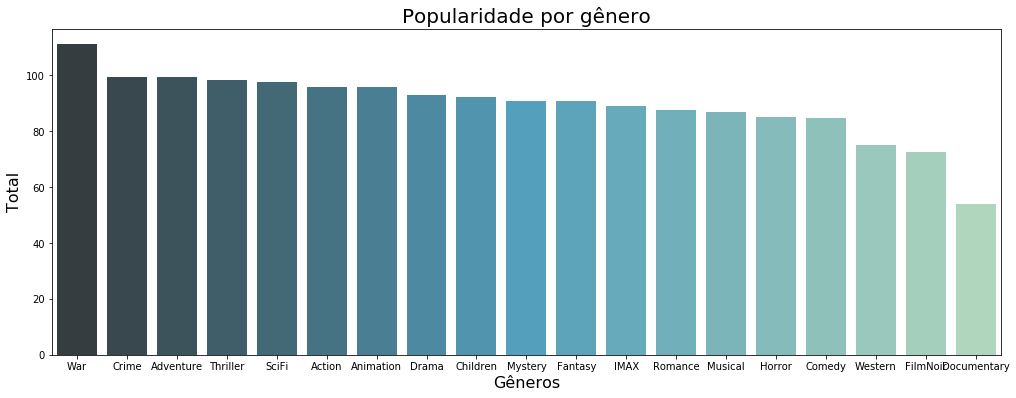

In [66]:
# solução com visualização 
ax = sns.barplot(x = 'Generos',
                 y = 'Popularidade media',
                 data = popularidade_por_filme_por_genero,
                 palette="GnBu_d")

ax.figure.set_size_inches(17, 6)
ax.set_title('Popularidade por gênero', fontsize = 20)
ax.set_xlabel('Gêneros', fontsize = 16)
ax.set_ylabel('Total', fontsize = 16)

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    
"Action" teve a maior quantidade de votos por gênero (segunda visualização), no entanto em terceiro em filmes por gênero (primeira visualização). Ao final, quando calculou-se a popularidade, ele caiu para sexto lugar. 
O contrário aconteceu com o gênero "War", pois ele estava em décimo sexto em filmes por gênero e décimo quinto em votos por gênero, mas ficou em primeiro quando calculou-se a popularidade, mostrando um engajamento maior do votantes.

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

{'whiskers': [<matplotlib.lines.Line2D at 0x16ac526cec8>,
 'caps': [<matplotlib.lines.Line2D at 0x16ac526ef88>,
 'boxes': [<matplotlib.lines.Line2D at 0x16ac526bc08>,
 'medians': [<matplotlib.lines.Line2D at 0x16ac5270e88>,
 'fliers': [<matplotlib.lines.Line2D at 0x16ac5273e88>,
 'means': []}

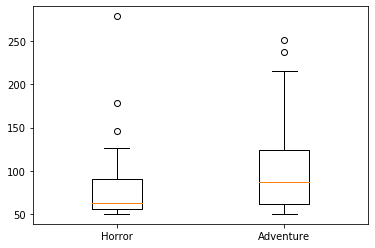

In [67]:
# solução:
import matplotlib.pyplot as plt 

votos_horror = votos_por_genero_por_filme.query('Horror != 0')['Horror']
votos_adventure = votos_por_genero_por_filme.query('Adventure != 0')['Adventure']

plt.boxplot(x = [votos_horror, votos_adventure],
            labels = ['Horror', 'Adventure'],
            widths = 0.3)

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

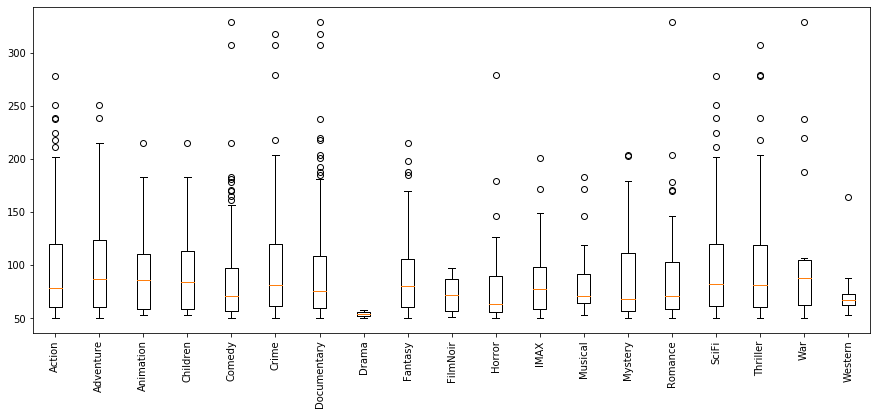

In [68]:
votos_action = votos_por_genero_por_filme.query('Action != 0')['Action']
votos_adventure = votos_por_genero_por_filme.query('Adventure != 0')['Adventure']
votos_animation = votos_por_genero_por_filme.query('Animation != 0')['Animation']
votos_children = votos_por_genero_por_filme.query('Children != 0')['Children']
votos_comedy = votos_por_genero_por_filme.query('Comedy != 0')['Comedy']
votos_crime = votos_por_genero_por_filme.query('Crime != 0')['Crime']
votos_drama = votos_por_genero_por_filme.query('Drama != 0')['Drama']
votos_documentary = votos_por_genero_por_filme.query('Documentary != 0')['Documentary']
votos_fantasy = votos_por_genero_por_filme.query('Fantasy != 0')['Fantasy']
votos_noir = votos_por_genero_por_filme.query('FilmNoir != 0')['FilmNoir']
votos_horror = votos_por_genero_por_filme.query('Horror != 0')['Horror']
votos_imax = votos_por_genero_por_filme.query('IMAX != 0')['IMAX']
votos_musical = votos_por_genero_por_filme.query('Musical != 0')['Musical']
votos_mistery = votos_por_genero_por_filme.query('Mystery != 0')['Mystery']
votos_romance = votos_por_genero_por_filme.query('Romance != 0')['Romance']
votos_scifi = votos_por_genero_por_filme.query('SciFi != 0')['SciFi']
votos_thriller = votos_por_genero_por_filme.query('Thriller != 0')['Thriller']
votos_war = votos_por_genero_por_filme.query('War != 0')['War']
votos_western = votos_por_genero_por_filme.query('Western != 0')['Western']


ax = plt.figure(figsize=(15,6))
ax = plt.boxplot(x = [votos_action, votos_adventure, votos_animation, votos_children, votos_comedy, votos_crime, votos_drama,
                votos_documentary, votos_fantasy, votos_noir, votos_horror, votos_imax, votos_musical, votos_mistery, 
                votos_romance, votos_scifi, votos_thriller, votos_war, votos_western],
                labels = votos_por_genero_por_filme.columns,
                widths = 0.3)
ax = plt.xticks(rotation = 90)

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    
Sugiro "Adventure", pois há mais votos para esse gênero e a distribuição dos votos é menos dispersa.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0, 0.5, 'Frequência')

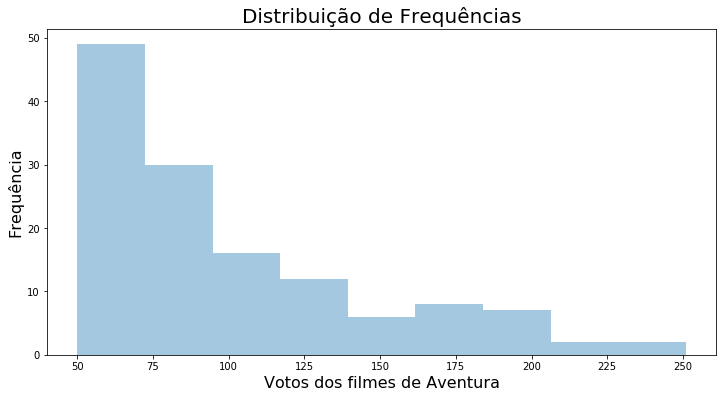

In [69]:
# solucao histograma de aventura
votos_adventure = votos_por_genero_por_filme.query('Adventure != 0')['Adventure']

ax = sns.distplot(votos_adventure, 
                  norm_hist = False, 
                  kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 20)
ax.set_xlabel('Votos dos filmes de Aventura', fontsize = 16)
ax.set_ylabel('Frequência', fontsize = 16)

Text(0, 0.5, 'Frequência')

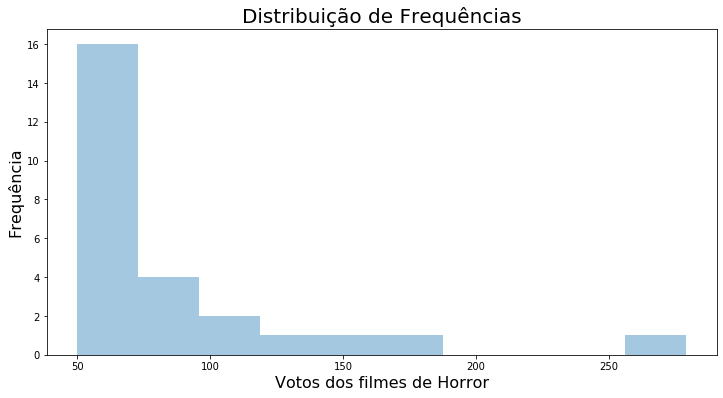

In [70]:
# solucao histograma de horror
votos_horror = votos_por_genero_por_filme.query('Horror != 0')['Horror']

ax = sns.distplot(votos_horror, 
                  norm_hist = False, 
                  kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 20)
ax.set_xlabel('Votos dos filmes de Horror', fontsize = 16)
ax.set_ylabel('Frequência', fontsize = 16)

In [71]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest
_, p_adventure = normaltest(votos_adventure)

_, p_horror = normaltest(votos_horror)

p_adventure, p_horror

(5.987863006199139e-06, 1.2786148884334685e-07)

In [72]:
# solução com o teste desejado
from scipy.stats import ranksums
_, p = ranksums(votos_adventure, votos_horror)
p

0.04782366231999856

### Solução (explique sua conclusão):

Olhando graficamente, nota-se que a distribuição dos votos de "Adventure" e "Horror" não é uma distribuição normal.
O 'normaltest' confirma isso, pois ambos os 'p_values' são muito menores que 0.05 (valor adotado).

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

{'whiskers': [<matplotlib.lines.Line2D at 0x16ac53bd108>,
 'caps': [<matplotlib.lines.Line2D at 0x16ac53be3c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x16ac53bb988>,
 'medians': [<matplotlib.lines.Line2D at 0x16ac53aac48>,
 'fliers': [<matplotlib.lines.Line2D at 0x16ac53b1808>,
 'means': []}

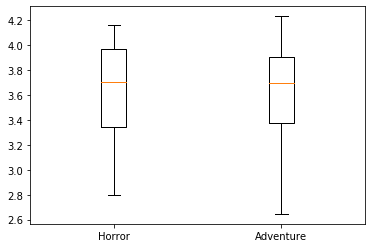

In [73]:
# solução:
nota_media_horror = filmes.query('Horror == 1')['nota_media']
nota_media_adventure = filmes.query('Adventure == 1')['nota_media']
plt.boxplot(x = [nota_media_horror, nota_media_adventure],
            labels = ['Horror', 'Adventure'])

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

Recomendo "Horror", pois mesmo tendo seus boxplots parecidos, o de "Horror" um pouco menos disperso.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

Text(0, 0.5, 'Frequência')

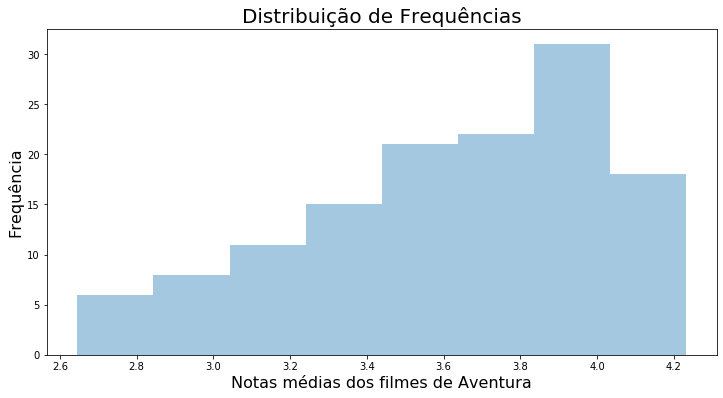

In [74]:
# solucao histograma de aventura
nota_media_adventure = filmes.query('Adventure == 1')['nota_media']

ax = sns.distplot(nota_media_adventure, 
                  norm_hist = False, 
                  kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 20)
ax.set_xlabel('Notas médias dos filmes de Aventura', fontsize = 16)
ax.set_ylabel('Frequência', fontsize = 16)

Text(0, 0.5, 'Frequência')

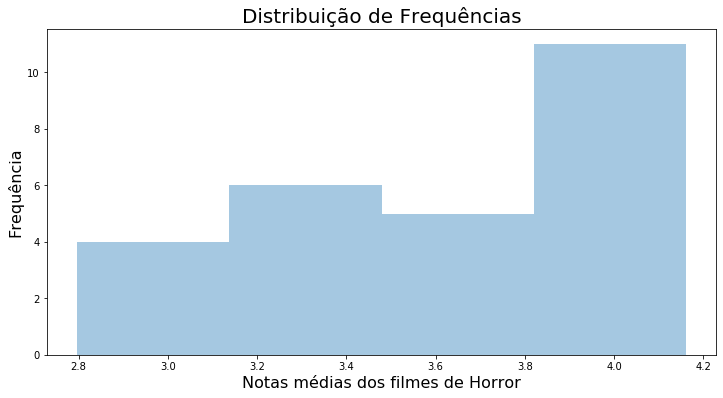

In [75]:
# solucao histograma de horror
nota_media_horror = filmes.query('Horror == 1')['nota_media']

ax = sns.distplot(nota_media_horror, 
                  norm_hist = False, 
                  kde = False)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize = 20)
ax.set_xlabel('Notas médias dos filmes de Horror', fontsize = 16)
ax.set_ylabel('Frequência', fontsize = 16)

In [76]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
_, p_adventure = normaltest(nota_media_adventure)

_, p_horror = normaltest(nota_media_horror)

p_adventure, p_horror

(0.012835697582553224, 0.21186284682483916)

In [77]:
# solução com o teste desejado

# O 'p_adevnture' prova que a distribuiçã não é normal, pois é menor que 0.05.
# O 'p_horro' indica que é uma distrbuição normal, no entanto, não considerarei, 
# pois as notas médias de horror é um espaço a mostra pequeno.

nota_media_adventure.shape[0], nota_media_horror.shape[0]

(132, 26)

In [78]:
# solução com o teste desejado
from scipy.stats import ranksums
_, p = ranksums(nota_media_adventure, nota_media_horror)
p

0.8310397344212459

## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:

Não, pois p > 0.05, o que confirma a hipótese nula, em que diz que os dois conjuntos podem ter sido tirados da mesma distribuição.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:

Eu recomendaria "Adventure", pois possui uma "Popularidade"  maior e mais votos que "Horror".


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [79]:
# solução: calculando os 2 generos mais votados
contagem_votos_por_genero_por_filme = votos_por_genero_por_filme.sum().to_frame().reset_index()
contagem_votos_por_genero_por_filme.columns = ['Generos', 'Total de votos']
contagem_votos_por_genero_por_filme.sort_values(by = ['Total de votos'], 
                                                ascending = False, 
                                                inplace = True)

votos_por_genero = contagem_votos_por_genero_por_filme[:2]
votos_por_genero

,Generos,Total de votos
0,Action,15734.0
7,Drama,15445.0


In [80]:
# solução: encontrando os top 5 filmes desses generos
top5_dois_generos = filmes.query(('Action == 1') or ('Drama == 1'))
top5_dois_generos.sort_values(by = ['nota_media'], 
                                    ascending = False, 
                                    inplace = True)
top5_dois_generos[:5]

C:\Users\Hugo Garutti\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
2959,Fight Club (1999),1999.0,4.272936,218.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
58559,"Dark Knight, The (2008)",2008.0,4.238255,149.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1197,"Princess Bride, The (1987)",1987.0,4.232394,142.0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
260,Star Wars: Episode IV - A New Hope (1977),1977.0,4.231076,251.0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1208,Apocalypse Now (1979),1979.0,4.219626,107.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [81]:
# solucao
correlação_filmes = filmes.corr().round(4)
correlação_filmes.sort_values(by = ['nota_media'], 
                                    ascending = False, 
                                    inplace = True)
correlação_filmes

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
nota_media,-0.1591,1.0000,0.3426,-0.1541,-0.0800,0.0431,-0.0304,-0.2560,0.1902,-0.0035,...,0.0818,-0.0339,0.0649,-0.0085,0.1299,-0.0720,-0.1367,-0.0168,0.1256,-0.0596
total_de_votos,-0.0287,0.3426,1.0000,0.0662,0.1044,0.0234,0.0018,-0.1285,0.0798,-0.0550,...,-0.0394,-0.0361,-0.0163,-0.0247,-0.0071,-0.0454,0.0638,0.0855,0.0880,-0.0608
Drama,0.0284,0.2777,0.0188,-0.2536,-0.2903,-0.1219,-0.1256,-0.2890,0.0922,0.0182,...,-0.0233,-0.1104,-0.0825,-0.0818,0.0163,0.0664,-0.1592,-0.0378,0.2059,-0.0122
Crime,0.0610,0.1902,0.0798,0.0619,-0.2413,-0.0917,-0.1304,-0.1262,1.0000,-0.0327,...,0.1934,-0.0489,-0.0329,-0.1083,0.1144,-0.2075,-0.1784,0.2488,-0.0748,-0.0810
Mystery,0.0056,0.1299,-0.0071,-0.0639,-0.0903,-0.0529,-0.0776,-0.2002,0.1144,-0.0203,...,0.3118,0.1303,0.0210,-0.0672,1.0000,-0.0649,-0.0152,0.3205,-0.0638,-0.0503
War,0.0261,0.1256,0.0880,0.0706,-0.0867,-0.0581,-0.0717,-0.0821,-0.0748,-0.0140,...,-0.0199,-0.0520,-0.0083,-0.0465,-0.0638,-0.0166,-0.1064,-0.0526,1.0000,0.0338
FilmNoir,0.0022,0.0818,-0.0394,-0.0225,-0.0610,-0.0262,-0.0323,-0.0777,0.1934,-0.0063,...,1.0000,-0.0235,-0.0244,-0.0210,0.3118,-0.0457,-0.0480,0.1562,-0.0199,-0.0157
IMAX,0.2480,0.0649,-0.0163,0.1299,0.2180,0.1077,0.0925,-0.1550,-0.0329,-0.0172,...,-0.0244,-0.0244,1.0000,0.0302,0.0210,-0.0773,0.1203,-0.0110,-0.0083,-0.0426
Animation,-0.0529,0.0431,0.0234,-0.1736,0.1636,1.0000,0.7537,0.1257,-0.0917,-0.0185,...,-0.0262,-0.0685,0.1077,0.4307,-0.0529,0.0211,-0.0974,-0.1678,-0.0581,-0.0458
Documentary,0.0477,-0.0035,-0.0550,-0.0506,-0.0430,-0.0185,-0.0228,0.0133,-0.0327,1.0000,...,-0.0063,-0.0165,-0.0172,-0.0148,-0.0203,-0.0322,-0.0339,-0.0405,-0.0140,-0.0111


## Resposta

Os maiores valores de correlações dos filmes com a nota média são o de "Drama" (0.2777) e "Comedy"(-0.2560, sendo uma correlação negativa). Já os menores valores de correlação são "Documentary" (-0.0034) e "Musical"(-0.0085).


## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [82]:
# solucao
correlação_filmes.sort_values(by = ['total_de_votos'], 
                                    ascending = False, 
                                    inplace = True)
correlação_filmes

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
total_de_votos,-0.0287,0.3426,1.0000,0.0662,0.1044,0.0234,0.0018,-0.1285,0.0798,-0.0550,...,-0.0394,-0.0361,-0.0163,-0.0247,-0.0071,-0.0454,0.0638,0.0855,0.0880,-0.0608
nota_media,-0.1591,1.0000,0.3426,-0.1541,-0.0800,0.0431,-0.0304,-0.2560,0.1902,-0.0035,...,0.0818,-0.0339,0.0649,-0.0085,0.1299,-0.0720,-0.1367,-0.0168,0.1256,-0.0596
Adventure,0.1143,-0.0800,0.1044,0.3336,1.0000,0.1636,0.1790,-0.0905,-0.2413,-0.0430,...,-0.0610,-0.0968,0.2180,-0.0500,-0.0903,-0.1737,0.2785,-0.0054,-0.0867,0.0448
War,0.0261,0.1256,0.0880,0.0706,-0.0867,-0.0581,-0.0717,-0.0821,-0.0748,-0.0140,...,-0.0199,-0.0520,-0.0083,-0.0465,-0.0638,-0.0166,-0.1064,-0.0526,1.0000,0.0338
Thriller,0.1045,-0.0168,0.0855,0.3114,-0.0054,-0.1678,-0.2071,-0.3646,0.2488,-0.0405,...,0.1562,0.0646,-0.0110,-0.1342,0.3205,-0.2030,0.1400,1.0000,-0.0526,-0.1004
Crime,0.0610,0.1902,0.0798,0.0619,-0.2413,-0.0917,-0.1304,-0.1262,1.0000,-0.0327,...,0.1934,-0.0489,-0.0329,-0.1083,0.1144,-0.2075,-0.1784,0.2488,-0.0748,-0.0810
Action,0.1404,-0.1541,0.0662,1.0000,0.3336,-0.1736,-0.2133,-0.2916,0.0619,-0.0506,...,-0.0225,-0.0094,0.1299,-0.1456,-0.0639,-0.2003,0.3260,0.3114,0.0706,0.0466
SciFi,0.0698,-0.1367,0.0638,0.3260,0.2785,-0.0974,-0.1011,-0.2136,-0.1784,-0.0339,...,-0.0480,0.0162,0.1203,-0.0860,-0.0152,-0.1883,1.0000,0.1400,-0.1064,-0.0155
Animation,-0.0529,0.0431,0.0234,-0.1736,0.1636,1.0000,0.7537,0.1257,-0.0917,-0.0185,...,-0.0262,-0.0685,0.1077,0.4307,-0.0529,0.0211,-0.0974,-0.1678,-0.0581,-0.0458
Drama,0.0284,0.2777,0.0188,-0.2536,-0.2903,-0.1219,-0.1256,-0.2890,0.0922,0.0182,...,-0.0233,-0.1104,-0.0825,-0.0818,0.0163,0.0664,-0.1592,-0.0378,0.2059,-0.0122


## Resposta

Os maiores valores de correlações dos filmes com o total de votos são o de "Adventure" (0.1044) e "Comedy"(-0.2916). 
Já os menores valores de correlação são "Children" (0.0018) e "Mystery"(-0.0071).

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

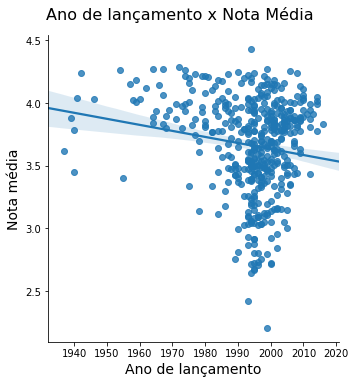

In [83]:
# solucao
ax = sns.lmplot(x = 'ano_de_lancamento', y = 'nota_media', data = filmes)

ax.fig.suptitle('Ano de lançamento x Nota Média', fontsize = 16, y = 1.05)
ax.set_xlabels('Ano de lançamento', fontsize = 14)
ax.set_ylabels('Nota média', fontsize = 14)
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [84]:
# solução (código)
filmes.corr().round(4)

,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
ano_de_lancamento,1.0000,-0.1591,-0.0287,0.1404,0.1143,-0.0529,-0.1490,0.0193,0.0610,0.0477,...,0.0022,-0.0269,0.2480,-0.2962,0.0056,-0.0246,0.0698,0.1045,0.0261,-0.0625
nota_media,-0.1591,1.0000,0.3426,-0.1541,-0.0800,0.0431,-0.0304,-0.2560,0.1902,-0.0035,...,0.0818,-0.0339,0.0649,-0.0085,0.1299,-0.0720,-0.1367,-0.0168,0.1256,-0.0596
total_de_votos,-0.0287,0.3426,1.0000,0.0662,0.1044,0.0234,0.0018,-0.1285,0.0798,-0.0550,...,-0.0394,-0.0361,-0.0163,-0.0247,-0.0071,-0.0454,0.0638,0.0855,0.0880,-0.0608
Action,0.1404,-0.1541,0.0662,1.0000,0.3336,-0.1736,-0.2133,-0.2916,0.0619,-0.0506,...,-0.0225,-0.0094,0.1299,-0.1456,-0.0639,-0.2003,0.3260,0.3114,0.0706,0.0466
Adventure,0.1143,-0.0800,0.1044,0.3336,1.0000,0.1636,0.1790,-0.0905,-0.2413,-0.0430,...,-0.0610,-0.0968,0.2180,-0.0500,-0.0903,-0.1737,0.2785,-0.0054,-0.0867,0.0448
Animation,-0.0529,0.0431,0.0234,-0.1736,0.1636,1.0000,0.7537,0.1257,-0.0917,-0.0185,...,-0.0262,-0.0685,0.1077,0.4307,-0.0529,0.0211,-0.0974,-0.1678,-0.0581,-0.0458
Children,-0.1490,-0.0304,0.0018,-0.2133,0.1790,0.7537,1.0000,0.1200,-0.1304,-0.0228,...,-0.0323,-0.0846,0.0925,0.4067,-0.0776,-0.0163,-0.1011,-0.2071,-0.0717,-0.0565
Comedy,0.0193,-0.2560,-0.1285,-0.2916,-0.0905,0.1257,0.1200,1.0000,-0.1262,0.0133,...,-0.0777,-0.0283,-0.1550,0.0549,-0.2002,0.2294,-0.2136,-0.3646,-0.0821,0.0049
Crime,0.0610,0.1902,0.0798,0.0619,-0.2413,-0.0917,-0.1304,-0.1262,1.0000,-0.0327,...,0.1934,-0.0489,-0.0329,-0.1083,0.1144,-0.2075,-0.1784,0.2488,-0.0748,-0.0810
Documentary,0.0477,-0.0035,-0.0550,-0.0506,-0.0430,-0.0185,-0.0228,0.0133,-0.0327,1.0000,...,-0.0063,-0.0165,-0.0172,-0.0148,-0.0203,-0.0322,-0.0339,-0.0405,-0.0140,-0.0111


### Solução (explicação)

O valor da correlação do ano_de_lançamento e nota_media é de -0.1591.
Desta forma, a correlação indica que filmes lançados em anos mais recentes tendem a ter uma nota média menor. 
O "problema" na coleta de dados seria a lembrança mais recentes dos filmes mais atuais, enquanto os filmes mais antigos possuem notas melhores devido ao peso da nostalgia. Outro fator é que normalmente assistisse os filmes mais recentes com mais frequência, enquanto assitisse os filmes antigos mais renomados.

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

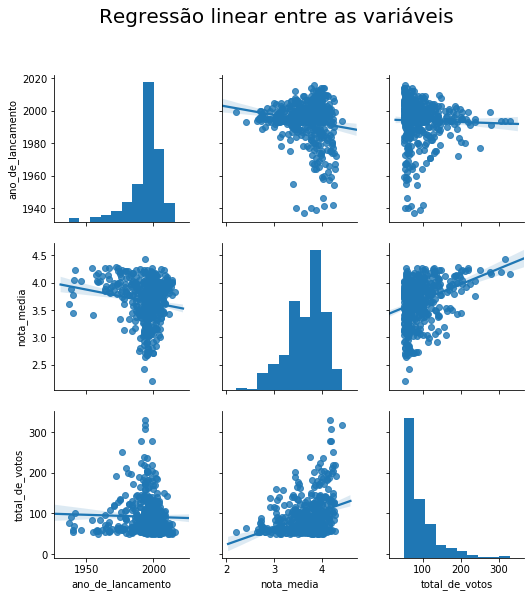

In [85]:
# solução
infos = pd.DataFrame()

infos['filmes'] = filmes['titulo']
infos['ano_de_lancamento'] = filmes['ano_de_lancamento']
infos['nota_media'] = filmes['nota_media']
infos['total_de_votos'] = filmes['total_de_votos']

ax = sns.pairplot(infos, kind ='reg')
ax.fig.suptitle('Regressão linear entre as variáveis', fontsize = 20, y = 1.1)
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

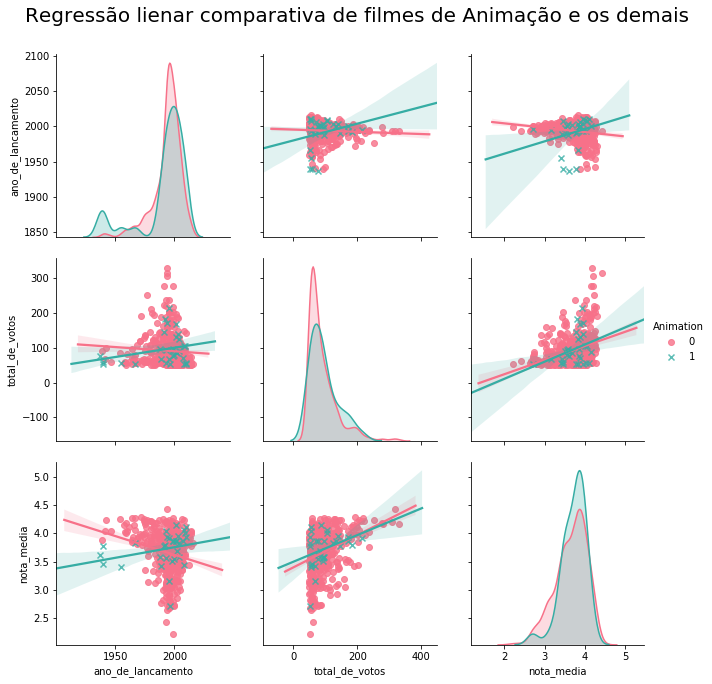

In [86]:
ax = sns.pairplot(data = filmes,
                  vars = ['ano_de_lancamento', 'total_de_votos', 'nota_media'],
                  kind ='reg',
                  hue = 'Animation',
                  markers = ['o', 'x'],
                  palette = "husl",
                  height = 3)
ax.fig.suptitle('Regressão lienar comparativa de filmes de Animação e os demais', fontsize = 20, y = 1.05)
ax


## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

1. Os filmes de "Animation" mais antigos parecem ser piores avaliados. Não, a correlação não parece ser linear.

2. Os filmes de "Animation" mais recentes possuem mais votos. A correlação parece ser baixa, mas aparenta ser linear.

3. Tantos os filmes de "Animation" quanto os restantes aparentam ter uma correlação entre o total de votos e a nota media, sendo que maior o número de votos maior é a nota.

4. Tirando 'total_de_votos x nota_media', todas as demais regressões são opostas entre os filmes de "Animation" e os demais, levantando a hipótese que os filmes de "Animation" possuem comportamento inverso aos demais.


## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

([<matplotlib.patches.Wedge at 0x16ac8e98748>,
 [Text(0.999953031492276, 0.45836004931648155, 'Comedy'),
  Text(-0.9999530744070367, -0.45835995569411986, 'Restantes')])

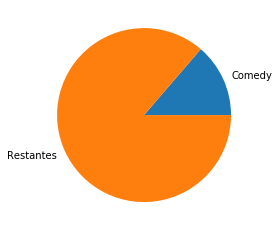

In [87]:
# solução
contagem_comedy = generos['Comedy'].sum()
contagem_restante = contagem_generos['Filmes por genero'].sum() - contagem_comedy

dados = {
    'Genero' : ['Comedy','Restantes'],
    'Total' : [contagem_comedy, contagem_restante]
}
dados = pd.DataFrame(dados)

porcentagem_comedia = contagem_comedy/(contagem_comedy + contagem_restante)*100
porcentagem_comedia

plt.pie(dados['Total'], labels = dados['Genero'])

In [88]:
print('O gênero Comedy, o gênero com mais filmes, representa {:.2f}%'.format(porcentagem_comedia))

O gênero Comedy, o gênero com mais filmes, representa 13.68%


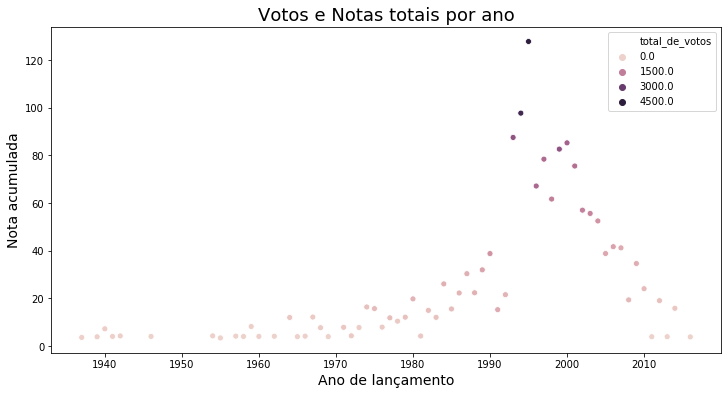

In [89]:
filmes_por_ano = filmes.groupby(['ano_de_lancamento']).sum()

ax = sns.scatterplot(x = filmes_por_ano.index, 
                     y = filmes_por_ano['nota_media'],
                     hue = filmes_por_ano['total_de_votos'],
                     data = filmes_por_ano)
ax.figure.set_size_inches(12, 6)
ax.set_title('Votos e Notas totais por ano', fontsize=18)
ax.set_xlabel('Ano de lançamento', fontsize=14)
ax.set_ylabel('Nota acumulada', fontsize=14)
ax

### Resposta

Nota-se que há um pico entre as décadas de 1990 e 2000. Como foi usado os valores das notas médias e votos somados para cada ano, pode-se concluir que há mais filmes deste período no dataframe 'filmes'.